Importar Librerias

In [1]:
import numpy as np 
import pandas as pd 

Importar Dataset

In [2]:
df = pd.read_csv('.\\BikePrices.csv')

In [3]:
df.shape

(1061, 8)

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [5]:
df["Brand"].unique()

array(['TVS', 'Bajaj', 'Yo', 'Honda', 'Mahindra', 'Hero', 'Yamaha',
       'Suzuki', 'Activa', 'Vespa', 'Royal', 'Benelli', 'KTM', 'UM',
       'Kawasaki', 'Hyosung', 'BMW', 'Harley', 'Jawa', 'Aprilia'],
      dtype=object)

In [6]:
df.groupby(["Brand"]).count()

,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
Brand,,,,,,,
Activa,3,3,3,3,3,3,3
Aprilia,2,2,2,2,2,2,0
BMW,1,1,1,1,1,1,1
Bajaj,260,260,260,260,260,260,143
Benelli,1,1,1,1,1,1,1
Harley,2,2,2,2,2,2,2
Hero,232,232,232,232,232,232,108
Honda,204,204,204,204,204,204,170
Hyosung,1,1,1,1,1,1,1


In [7]:
df["Brand"].value_counts()

Brand
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Kawasaki      4
Vespa         4
UM            3
Jawa          3
Activa        3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: count, dtype: int64

In [8]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [9]:
counts=df.Brand.value_counts()
porc_yamaha=counts.iloc[4] / (counts.sum()) * 100
print(f'Porcentaje de Yamahas = {porc_yamaha:.1f}%')
              

Porcentaje de Yamahas = 9.6%


In [10]:
duplicados=len(df[df.duplicated()])
print(f'Número de entradas duplicadas: {duplicados}')

Número de entradas duplicadas: 6


In [11]:
val_perdidos=df.isnull().sum().sum()
print(f'Número de valores perdidos: {val_perdidos}')

Número de valores perdidos: 435


In [12]:
tipos=df.dtypes.value_counts()

print('Número de características: %d'%(df.shape[1]))
print('Número de entradas: %d'%(df.shape[0]))
print('Tipos de datos y su frecuencia: ')
print(tipos)

Número de características: 8
Número de entradas: 1061
Tipos de datos y su frecuencia: 
object     4
int64      3
float64    1
Name: count, dtype: int64


Pre-Procesamiento

In [13]:
df["Seller_Type"]= df["Seller_Type"].map({'Individual':1,'Dealer':0})

In [14]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['float64']).columns

# codificación 
df = pd.get_dummies(df, columns = catcols)
   
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 308


Histograma

(array([850., 158.,  40.,   8.,   2.,   1.,   0.,   0.,   0.,   2.]),
 array([  5000.,  80500., 156000., 231500., 307000., 382500., 458000.,
        533500., 609000., 684500., 760000.]),
 <BarContainer object of 10 artists>)

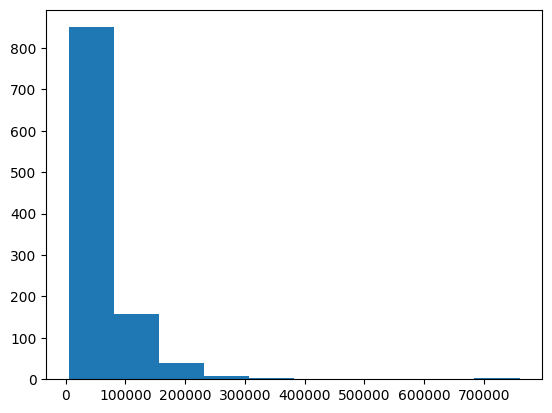

In [15]:
import matplotlib.pyplot as plt
plt.hist(df['Selling_Price'])